# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [2]:
#1
url = 'https://raw.githubusercontent.com/velcheiana/datasets/refs/heads/main/penguins_size.csv'
df = pd.read_csv(url)

# Display 10 sample rows from the dataset
df.sample(10)

#The code reads a penguin size dataset from a GitHub URL into a pandas DataFrame and randomly displays 10 sample rows for inspection.

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,MALE
43,Adelie,Dream,44.1,19.7,196.0,4400.0,MALE
134,Adelie,Dream,38.1,17.6,187.0,3425.0,FEMALE
50,Adelie,Biscoe,39.6,17.7,186.0,3500.0,FEMALE
309,Gentoo,Biscoe,52.1,17.0,230.0,5550.0,MALE
19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,MALE
163,Chinstrap,Dream,51.7,20.3,194.0,3775.0,MALE
139,Adelie,Dream,39.7,17.9,193.0,4250.0,MALE
204,Chinstrap,Dream,45.7,17.3,193.0,3600.0,FEMALE
196,Chinstrap,Dream,50.9,17.9,196.0,3675.0,FEMALE


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [3]:
#2
print(df.info()) #used to display a summary of information about a DataFrame structure, including the number of rows, columns, data types, non-null values, and memory usage

#The DataFrame contains 344 entries and 7 columns: species, island, culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g, and sex. Four columns are numerical (float64), while the remaining three are categorical (object). The dataset has some missing values: culmen_length_mm, culmen_depth_mm, flipper_length_mm, and body_mass_g each have 342 non-null entries (2 missing), while sex has 334 non-null entries (10 missing). These missing values suggest that data cleaning or imputation may be necessary for analysis.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None


3. Show describe column and conclude what the insight is from that column

In [4]:
#3
df.describe() #used to generate descriptive statistics (such as mean, median, standard deviation, and quartiles) for numerical columns in a DataFrame

#The descriptive statistics for the dataset show that the `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, and `body_mass_g` columns each have 342 non-null entries. The average culmen length is 43.92 mm, with a range from 32.10 mm to 59.60 mm, and the average culmen depth is 17.15 mm, ranging from 13.10 mm to 21.50 mm. The average flipper length is 200.91 mm, with a range between 172 mm and 231 mm, while the body mass has a mean of 4201.75 g, ranging from 2700 g to 6300 g. The data shows notable variation, especially in body mass and flipper length, suggesting possible outliers, but the majority of the values fall within typical ranges based on the interquartile data.

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [5]:
#4
species_count = df['species'].value_counts(dropna=False) #used to count the occurrences of each species in the species column, including NaN values.
island_count = df['island'].value_counts(dropna=False) #used to count the occurrences of each island in the species column, including NaN values.
sex_count = df['sex'].value_counts(dropna=False) #used to count the occurrences of each sex in the species column, including NaN values.

print(species_count)
print(island_count)
print(sex_count)

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
MALE      168
FEMALE    165
NaN        10
.           1
Name: count, dtype: int64


5. Null handling

In [6]:
#5
df = df.dropna() #to remove rows that have null values, because out of 344 records, only a small portion—just 2 records—are empty.
df.isnull().sum() #to count null values.

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


6. Create your own insightful visualization and explain it in at least 2 sentences

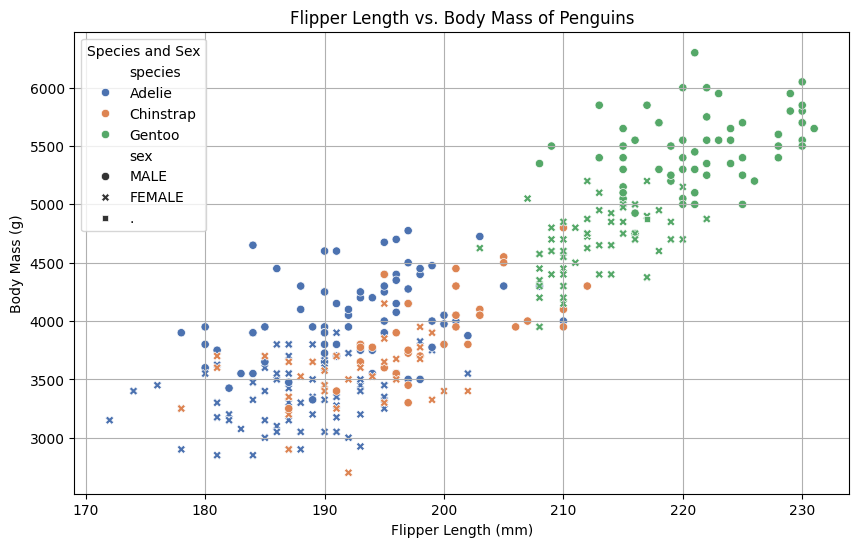

In [39]:
#6
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'https://raw.githubusercontent.com/velcheiana/datasets/refs/heads/main/penguins_size.csv'
df = pd.read_csv(url)

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='species', style='sex', palette='deep')
plt.title('Flipper Length vs. Body Mass of Penguins')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.grid()
plt.legend(title='Species and Sex')
plt.show()

#The scatter plot illustrates the relationship between flipper length and body mass among different penguin species.
#Each point is color-coded by species and differentiated by sex. We can observe that Adélie and Chinstrap penguins tend to cluster in the lower body mass range, while Gentoo penguins show a higher body mass and flipper length.
#This visualization highlights how physical characteristics can be used to distinguish between species.

<ipython-input-40-3aa6474aebf9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='species', y='body_mass_g', palette='pastel')


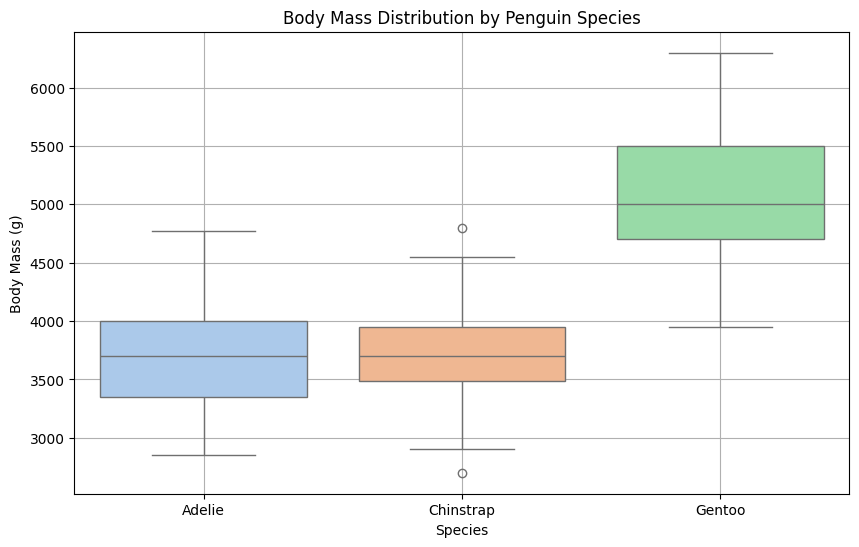

In [40]:
#6
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='species', y='body_mass_g', palette='pastel')
plt.title('Body Mass Distribution by Penguin Species')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')
plt.grid()
plt.show()

#The box plot presents the distribution of body mass across different penguin species. It clearly shows the median, quartiles, and potential outliers for each species.
#Gentoo penguins have the highest median body mass, significantly higher than that of the other species, while Adélie penguins show the smallest body mass range.
#This visualization provides insight into how body mass varies among species and can aid in understanding ecological adaptations and feeding strategies.

7. Check unique value of our target variable

In [8]:
#7
print(df['species'].unique()) #to view the unique values of the species column.

['Adelie' 'Chinstrap' 'Gentoo']


8. encode categorical columns and display the results

In [9]:
#8
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()  #create a LabelEncoder object from scikit-learn, which is used to transform categorical data into numerical values

# Encode the categorical columns 'island' and 'sex'
df['island'] = label_encoder.fit_transform(df['island']) #apply Label Encoding to the 'island' column
df['sex'] = label_encoder.fit_transform(df['sex']) # apply Label Encoding to the 'sex' column

# Display the first few rows to check the encoding
df.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.1,18.7,181.0,3750.0,2
1,Adelie,2,39.5,17.4,186.0,3800.0,1
2,Adelie,2,40.3,18.0,195.0,3250.0,1
4,Adelie,2,36.7,19.3,193.0,3450.0,1
5,Adelie,2,39.3,20.6,190.0,3650.0,2


9. encode the target column and display the results

In [10]:
#9
label_encoder = LabelEncoder() #create a LabelEncoder object from scikit-learn, which is used to transform categorical data into numerical values

# Encode the categorical columns 'species'
df['species'] = label_encoder.fit_transform(df['species']) #apply Label Encoding to the 'species' column

# Display the first few rows to check the encoding
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
4,0,2,36.7,19.3,193.0,3450.0,1
5,0,2,39.3,20.6,190.0,3650.0,2


10. create a heatmap to see the correlation and explain the conclusion

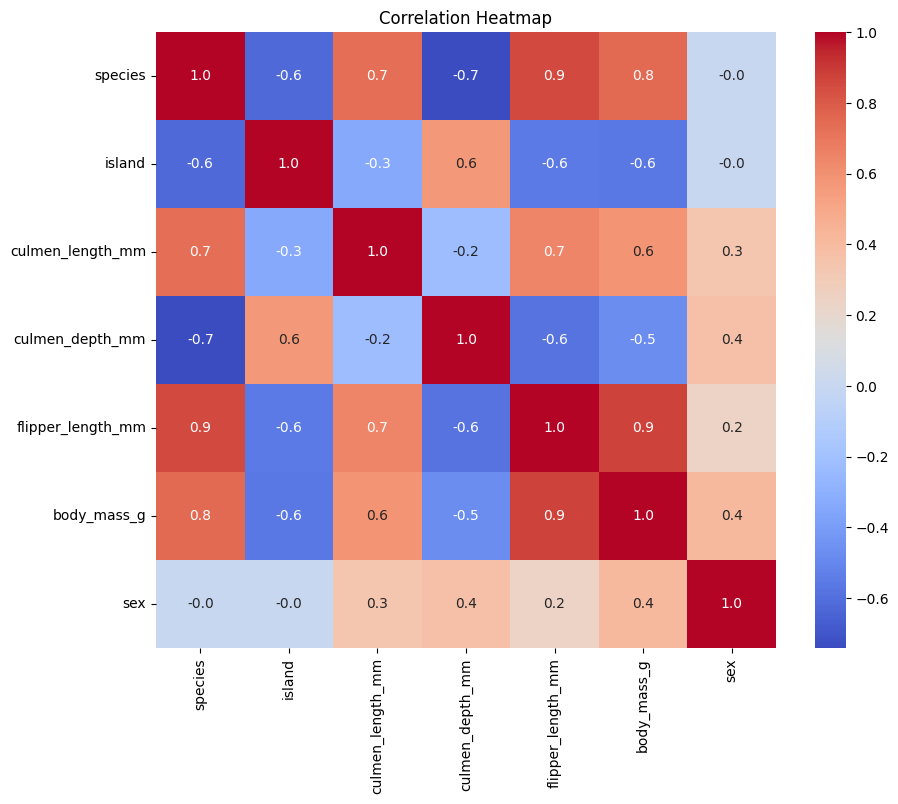

In [11]:
#10
correlation_matrix = df.corr() #calculate the correlation between numeric columns in the DataFrame df using the .corr() method
plt.figure(figsize=(10, 8)) #set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f") #create a heatmap using the previously calculated correlation matrix
plt.title("Correlation Heatmap") #title
plt.show() #sisplay the heatmap


## Machine Learning

1. Splitting X and y

In [12]:
#1
X = df.drop(['species'], axis=1) # Create a variable X that contains all columns from the DataFrame df, except for the 'species' column
y = df['species'] # Create a variable y that contains the 'species' column from the DataFrame df

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [13]:
#2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# To split the dataset into two parts: for training (80%) and for testing (20%).


In [14]:
#3
X_train.shape, X_test.shape # To show the number of rows and columns

((267, 6), (67, 6))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [15]:
#Criterion Entropy
#a
#instantiate the DecisionTreeClassifier model with criterion entropy
dt_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

#fit the model
dt_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [16]:
#b
y_pred_en = dt_en.predict(X_test) #To obtain the prediction results for the species of penguins from the test data

In [17]:
#c
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en))) # Print the accuracy result

Model accuracy score with criterion entropy: 0.9701


In [18]:
#d
print('Training set score: {:.4f}'.format(dt_en.score(X_train, y_train))) #Print the score of the training set
print('Test set score: {:.4f}'.format(dt_en.score(X_test, y_test))) #Print the score of the test set

Training set score: 0.9625
Test set score: 0.9701


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\nentropy = 1.524\nsamples = 267\nvalue = [115, 55, 97]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 42.35\nentropy = 0.938\nsamples = 164\nvalue = [113.0, 50.0, 1.0]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[2] <= 16.7\nentropy = 0.078\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.592\nsamples = 7\nvalue = [6, 1, 0]'),
 Text(0.25, 0.125, 'entropy = 0.0\nsamples = 98\nvalue = [98, 0, 0]'),
 Text(0.5, 0.375, 'x[4] <= 4075.0\nentropy = 0.736\nsamples = 59\nvalue = [9, 49, 1]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.159\nsamples = 43\nvalue = [1, 42, 0]'),
 Text(0.5833333333333334, 0.125, 'entropy = 1.272\nsamples = 16\nvalue = [8, 7, 1]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\nentropy = 0.417\nsamples = 103\nvalue = [2.0, 5.0, 96.0]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 96\nvalue = [0, 0, 96]'),
 Text(

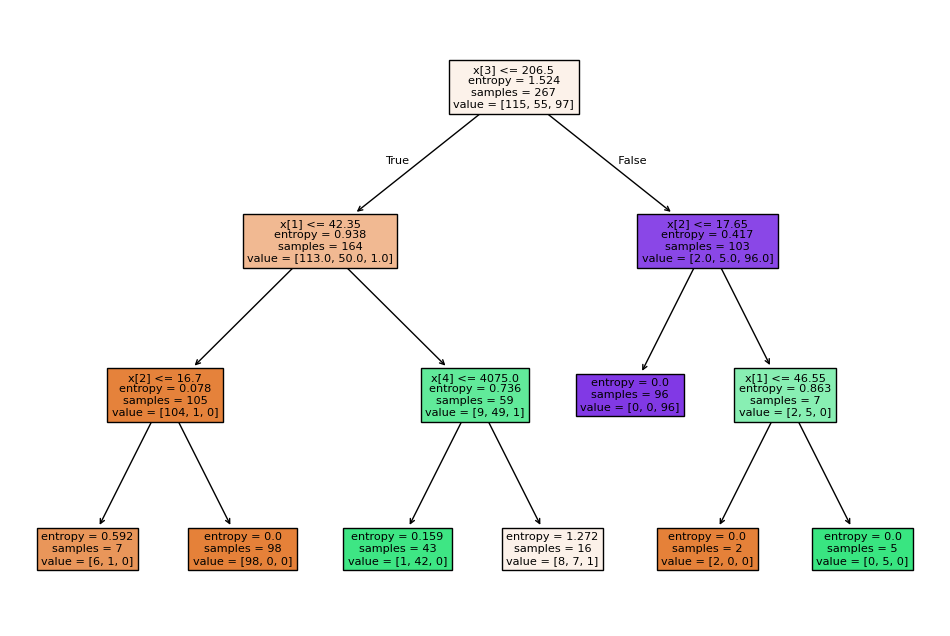

In [19]:
#e
plt.figure(figsize=(12,8))
tree.plot_tree(dt_en.fit(X_train, y_train), filled=True)

2. Criterion Gini index

In [20]:
#a
#instantiate the DecisionTreeClassifier model with criterion gini index
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

#fit the model
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [21]:
#b
y_pred_gini = dt_gini.predict(X_test) #To obtain the prediction results for the species of penguins from the test data using Gini

In [22]:
#c
print('Model accuracy score with criterion gini: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini))) #To print the accuracy result

Model accuracy score with criterion gini: 0.9851


In [23]:
#d
# print the scores on training and test set
print('Training set score: {:.4f}'.format(dt_gini.score(X_train, y_train))) #Print the score of the training set
print('Test set score: {:.4f}'.format(dt_gini.score(X_test, y_test))) #Print the score of the test set

Training set score: 0.9738
Test set score: 0.9851


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\ngini = 0.64\nsamples = 267\nvalue = [115, 55, 97]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 43.35\ngini = 0.432\nsamples = 164\nvalue = [113.0, 50.0, 1.0]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[1] <= 42.35\ngini = 0.068\nsamples = 113\nvalue = [109, 4, 0]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.019\nsamples = 105\nvalue = [104, 1, 0]'),
 Text(0.25, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [5, 3, 0]'),
 Text(0.5, 0.375, 'x[0] <= 1.5\ngini = 0.18\nsamples = 51\nvalue = [4, 46, 1]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.117\nsamples = 49\nvalue = [2.0, 46.0, 1.0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\ngini = 0.129\nsamples = 103\nvalue = [2.0, 5.0, 96.0]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 96\nvalue = [0, 0, 96]'),
 Text(0.8333333333333334, 0.375, 

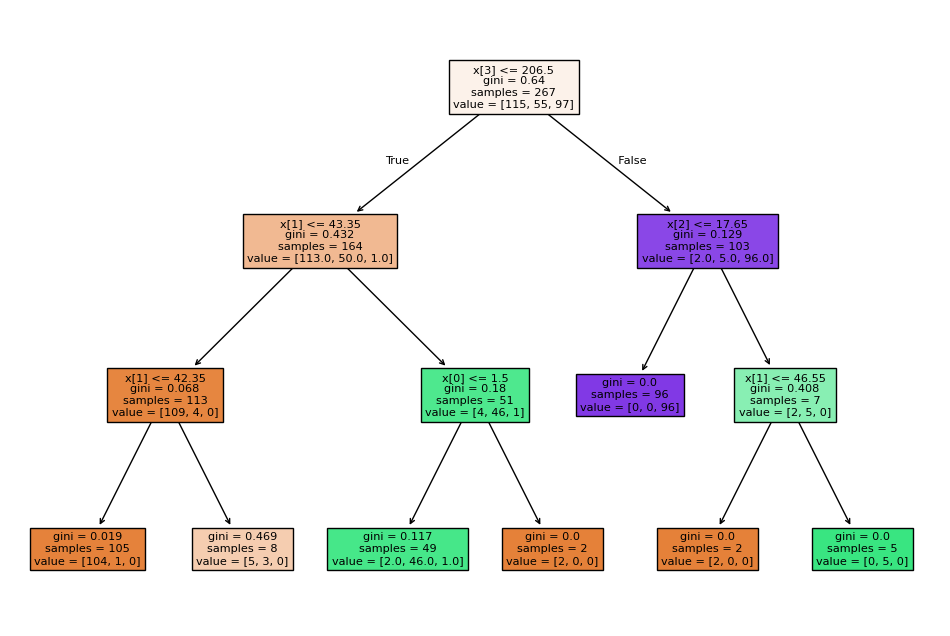

In [24]:
#e
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_gini.fit(X_train, y_train), filled=True) #Create and display the tree

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [25]:
#f
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en) #To create the confusion matrix
print("Confusion Matrix:\n", cm)

cm = confusion_matrix(y_test, y_pred_gini) #To create the confusion matrix
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[30  1  0]
 [ 1 12  0]
 [ 0  0 23]]
Confusion Matrix:
 [[31  0  0]
 [ 1 12  0]
 [ 0  0 23]]


In [26]:
#g
print(classification_report(y_test, y_pred_en)) #To create and print the classification report
print(classification_report(y_test, y_pred_gini)) #To create and print the classification report

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00        23

    accuracy                           0.97        67
   macro avg       0.96      0.96      0.96        67
weighted avg       0.97      0.97      0.97        67

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00        23

    accuracy                           0.99        67
   macro avg       0.99      0.97      0.98        67
weighted avg       0.99      0.99      0.98        67



In [27]:
#h
#The model using the Gini criterion performs slightly better than the model using the entropy criterion, as evidenced by higher precision, recall, F1-score, and accuracy.
#Both models show strong performance in classifying the penguin species, particularly for class 2, which has a perfect F1-score of 1.00 in both cases.

## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [28]:
#a
nb_classifier = GaussianNB() #To instantiate a Gaussian Naive Bayes object from the scikit-learn library.
nb_classifier.fit(X_train, y_train) #To train the created Naive Bayes model with the feature data X_train and label y_train.

GaussianNB()

In [29]:
#b
nb_y_pred = nb_classifier.predict(X_test) #To predict the labels using the previously trained Naive Bayes model.

In [30]:
#c
cm = confusion_matrix(y_test, nb_y_pred) #To create the confusion matrix for Naive Bayes
print("Confusion Matrix:\n", cm)

#d
# Display the accuracy score
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, nb_y_pred))) # To show the accuracy result

Confusion Matrix:
 [[31  0  0]
 [ 0 13  0]
 [ 0  0 23]]
Accuracy Score: 1.0000


In [31]:
#e
print(classification_report(y_test, nb_y_pred)) #To print the classification report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



In [32]:
#f
#The Gaussian Naive Bayes model performed exceptionally well on the test dataset, achieving perfect scores across all metrics for every class. This indicates that the model is both precise and accurate, correctly classifying every instance in the test set.
#Given the perfect performance, it is also worth considering the dataset's characteristics. The classes may be well-separated, or there could be a lack of complexity in the data that allows the model to achieve such high accuracy.

KNN
a. Defining the model
b. Predict the test set results
c. Check accuracy score
d. Confusion matrix
e. Classification report
f. Results and conclusion

Good Luck :)

In [33]:
#a
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean') #Create a KNN model with 5 nearest neighbors and using the Euclidean metric
knn.fit(X_train, y_train) #To train the model

KNeighborsClassifier(metric='euclidean')

In [34]:
#b
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [35]:
#c
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_knn))) #To show the accuracy result

Accuracy Score: 0.8209


In [36]:
#d
# Display the accuracy score
cm = confusion_matrix(y_test, y_pred_knn)
print ("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[25  2  4]
 [ 5  8  0]
 [ 0  1 22]]


In [37]:
#e
print(classification_report(y_test, y_pred_knn)) #To print the classification report

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        31
           1       0.73      0.62      0.67        13
           2       0.85      0.96      0.90        23

    accuracy                           0.82        67
   macro avg       0.80      0.79      0.79        67
weighted avg       0.82      0.82      0.82        67



In [38]:
#f
#The KNN model performed decently overall, with an accuracy of 82%. However, it struggles with classifying class 1, as evidenced by its lower precision, recall, and F1-score. This suggests that the model may not be capturing the characteristics of class 1 well.